<a href="https://colab.research.google.com/github/dp1706/Machine-Learning/blob/master/Assignment%208/ML_Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                 ***Assignment 8***

```

DataSet: IRIS DATASET

Method: Self Organizing Feature Map (inbuilt and Scratch)

Parts:

  * Downloading Package
  * Module
  * Data Visualization
  * SOM Implementation
    - SOM From Scratch
    - SOM Using Library Function
    - Silhouette Score Comparision
  * Compareing Accuracy Using Silhouette Score For the Assignment 7 (K-Means)
  * Comparing Silhouette Score of SOM and KMeans
```

### DownLoading Package

In [ ]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=d9601de199bdd9478cc4ac76419fc42571b3b5ee456c4b00534720a5b52bdcf9
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built MiniSom


### Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from minisom import MiniSom
from sklearn.cluster import KMeans
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')
print("True")

True


### Data Visualization

In [ ]:
dataset = load_iris()
dataset.filename

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv'

In [ ]:
X = pd.DataFrame(dataset.data,columns=dataset.feature_names)
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Y = pd.DataFrame(dataset.target,columns=['Class'])
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
X.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
Y.isna().sum()

Class    0
dtype: int64

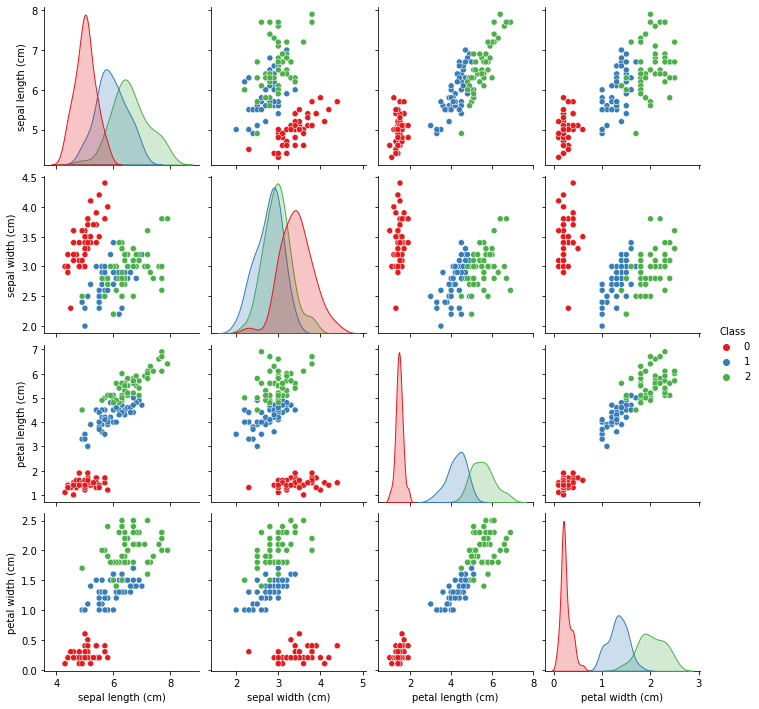

In [ ]:
sns.pairplot(data=X.join(Y),hue='Class',palette='Set1')
plt.show()

Number of Classes are :  [50 50 50]


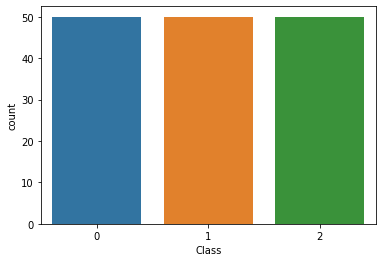

In [ ]:
print("Number of Classes are : ",np.bincount(Y['Class']))
sns.countplot(data=X.join(Y),x='Class')
plt.show()

In [ ]:
corr_table = X.corr()
corr_table

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


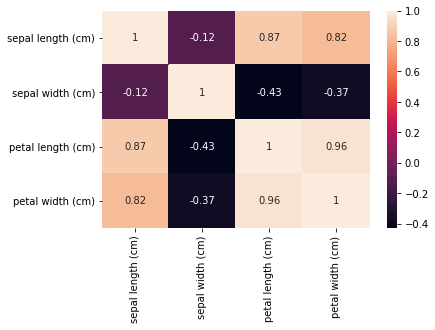

In [ ]:
sns.heatmap(data=X.corr(),annot=True,linecolor='red')
plt.show()

### SOM Implementation

#### SOM WithOut Inbuilt Function

##### Model

In [ ]:
def E_distance(a,b):
  return np.linalg.norm(a-b)

In [ ]:
def find_closest(weight,data):

  dist = [E_distance(data,weights) for weights in weight] 
  minimum = np.argmin(dist)
  return minimum

In [ ]:
def update_weight(weight,i,min_dist,learning_rate):
  weight[min_dist] += learning_rate * (i-weight[min_dist])
  return weight

In [ ]:
def SOM_Model(x,n_cluster=3,epoch=200,learning_rate=0.5):

  constLearningRate = learning_rate
  radius = max(1,n_cluster)/2
  radius1 = radius

  #weight = np.random.uniform(size=(n_cluster,x.shape[1]))
  weight = np.zeros((n_cluster,x.shape[1]))

  for i in range(n_cluster):
    weight[i] = x[i+3]
  epochs = 0

  while epochs < epoch:

    for i in x:

      #finding closest centroid point
      min_dist = find_closest(weight,i)
      weight = update_weight(weight,i,min_dist,learning_rate)

      learning_rate = constLearningRate * np.exp(-epochs/epoch)
      radius1 = radius * np.exp(-epochs/epoch)

    epochs += 1

  return weight

In [ ]:
def predict_labels(x,weights):
  predict = [find_closest(weights , i) for i in x]
  return np.array(predict)

In [ ]:
som_center_ = SOM_Model(X.to_numpy())
som_1_pred = predict_labels(X.to_numpy(),som_center_)
som_center_

array([[4.65012202, 3.04664976, 1.3714264 , 0.22154721],
       [6.37441582, 3.03944759, 5.30228931, 2.0841979 ],
       [5.12796315, 3.59357095, 1.5190136 , 0.2637562 ]])

In [ ]:
score_1 = silhouette_score(X.to_numpy(),som_1_pred)
print(score_1)

0.5204332390910091


##### Plotting Curve

* __n_cluster =3__

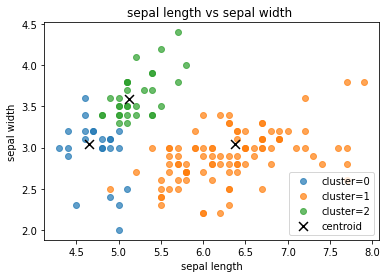

In [ ]:
data = X.values

# plotting the clusters using the sepal length vs sepal width
for c in np.unique(som_1_pred):
    plt.scatter(data[som_1_pred == c, 0],data[som_1_pred == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids

for centroid in np.array([som_center_]):
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', s=80, linewidths=35, color='k', label='centroid')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("sepal length vs sepal width ")
plt.legend();

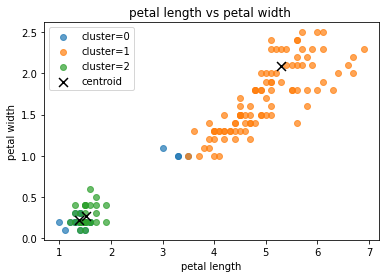

In [ ]:
data = X.values

# plotting the clusters using the petal length vs petal width
for c in np.unique(som_1_pred):
    plt.scatter(data[som_1_pred == c, 2],data[som_1_pred == c, 3], label='cluster='+str(c), alpha=.7)

# plotting centroids

for centroid in np.array([som_center_]):
    plt.scatter(centroid[:, 2], centroid[:, 3], marker='x', s=80, linewidths=35, color='k', label='centroid')
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("petal length vs petal width ")
plt.legend();

#### SOM With Inbuilt Function

##### Model

In [ ]:
som = MiniSom(x=1,y=3,input_len=X.shape[1],sigma = 0.5)

som.random_weights_init(X.to_numpy())

som.train_batch(X.to_numpy(),20000,verbose=True)

winner_coordinates = np.array([som.winner(x) for x in X.values]).T

ans = winner_coordinates[1:2,:].flatten()
print()

print("predicted cluster is :  \n", ans)

#som.random_weights_init(X.to_numpy())

 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 0.6981989802763595

predicted cluster is :  
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
som.get_weights()

array([[[4.95052654, 3.39339219, 1.4693585 , 0.25094142],
        [5.96397481, 2.77744617, 4.85068372, 1.68642544],
        [6.66711855, 3.15517709, 5.50897555, 2.21962586]]])

In [ ]:
score = silhouette_score(X.to_numpy(),ans)
score

0.5505254978303685

##### Plotting Graph

* __For n_cluster =3__

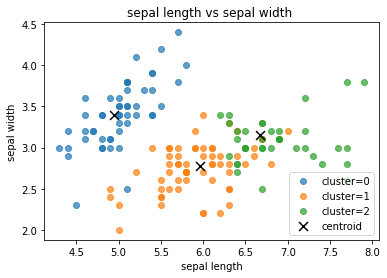

In [ ]:
data = X.values

# plotting the clusters using sepal length vs sepal width
for c in np.unique(ans):
    plt.scatter(data[ans == c, 0],data[ans == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids

for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', s=80, linewidths=35, color='k', label='centroid')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("sepal length vs sepal width ")
plt.legend();


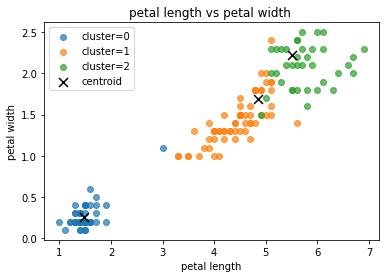

In [ ]:
# plotting the clusters using the petal length vs petal width

for c in np.unique(ans):
    plt.scatter(data[ans == c, 2],data[ans == c, 3], label='cluster='+str(c), alpha=.7)

# plotting centroids

for centroid in som.get_weights():
    plt.scatter(centroid[:, 2], centroid[:, 3], marker='x', s=80, linewidths=35, color='k', label='centroid')
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("petal length vs petal width ")
plt.legend();


#### Silhouette Coefficient Comparasion

In [ ]:
## For WithOut Inbuit we got Silhouette Coefficient Score
print("For n_cluster=3 we are doing...")
print("-------------------------------")
print("For WithOut Inbuit we got Silhouette Coefficient Score is : {} ".format(score_1))
print("For With Inbuit we got Silhouette Coefficient Score is : {} ".format(score))

For n_cluster=3 we are doing...
-------------------------------
For WithOut Inbuit we got Silhouette Coefficient Score is : 0.5204332390910091 
For With Inbuit we got Silhouette Coefficient Score is : 0.5505254978303685 


### Compareing the Accuracy using Silhouette Coefficient For the Previous Assignment(KMeans)

##### Actual plotting of given Data Cluster

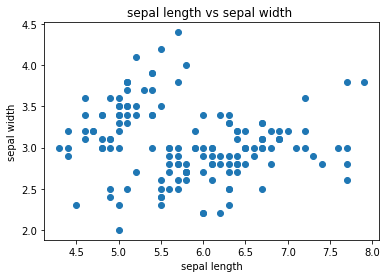

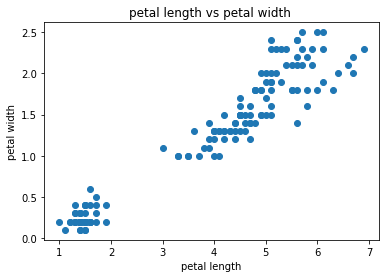

In [ ]:
#==========================================================
#================== ACTUAL DATA ===========================
#==========================================================

#sepal length vs sepal width
plt.scatter(X.iloc[:,0:1],X.iloc[:,1:2])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("sepal length vs sepal width ")
plt.show()

#petal width vs petal length
plt.scatter(X.iloc[:,2:3],X.iloc[:,3:4])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("petal length vs petal width ")
plt.show()

##### KMeans WithOut Inbuilt Function

In [ ]:
def K_Means(x,k):

  n = x.shape[0]
  c = x.shape[1]

  centers = np.zeros((k,c))

  for i in range(k):
    centers[i] = x[i+3]

  centers_old = np.zeros(centers.shape) 
  centers_new = deepcopy(centers)

  clusters = np.zeros(n)
  distances = np.zeros((n,k))

  error = np.sum((centers_new - centers_old)/centers_old * 100.0)
  while error > 0.1:
     
    for i in range(k):
        distances[:,i] = np.linalg.norm(x - centers_new[i], axis=1)
    
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)

    
    for i in range(k):
        centers_new[i] = np.mean(x[clusters == i], axis=0)

    error = np.sum((centers_new - centers_old)/centers_old * 100.0)
  return centers_new

In [ ]:
def predict(x,centroids):
  
  Y_pred = []
  for i in x:
    dist = [np.linalg.norm(i-centroid) for centroid in centroids]
    min_dist = np.argmin(dist)
    Y_pred.append(min_dist)
  return Y_pred 

In [ ]:
K = range(2,7)

silh_score1 = []

for k in K:

  centroids = K_Means(X.to_numpy(),k)
  predict_value = predict(X.to_numpy(),centroids)
  silhouette_pred_1 = silhouette_score(X,predict_value)
  silh_score1.append(silhouette_pred_1)

  print("For k = {} silhouette score is : {:.2f}".format(k,silhouette_pred_1)) 

For k = 2 silhouette score is : 0.68
For k = 3 silhouette score is : 0.55
For k = 4 silhouette score is : 0.41
For k = 5 silhouette score is : 0.38
For k = 6 silhouette score is : 0.36


##### KMeans With Inbuilt Function

In [ ]:
K2 = range(2,7)

silh_score2 = []

for k2 in K2:

  model = KMeans(n_clusters=k2)
  model.fit(X)
  model.predict(X)
  pred = model.labels_
  silhouette_pred = silhouette_score(X,pred)
  silh_score2.append(silhouette_pred)
  print("For k = {} silhouette score is : {:.2f}".format(k2,silhouette_pred)) 


For k = 2 silhouette score is : 0.68
For k = 3 silhouette score is : 0.55
For k = 4 silhouette score is : 0.50
For k = 5 silhouette score is : 0.49
For k = 6 silhouette score is : 0.36


##### Plotting Graph

[]

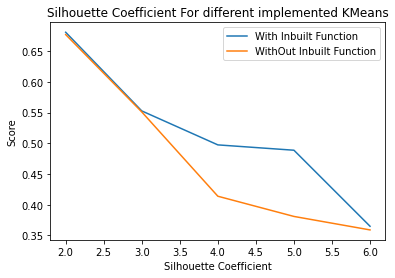

In [ ]:
plt.plot(K2,silh_score2,label='With Inbuilt Function')
plt.plot(K,silh_score1,label='WithOut Inbuilt Function')
plt.title("Silhouette Coefficient For different implemented KMeans")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Score")
plt.legend()
plt.plot()

### Comparing Silhouette Score of SOM and KMeans

* __For n_cluster = 3__

In [ ]:
# SOM Silhouette Score
print("For WithOut Inbuit we got Silhouette Coefficient Score is : {} ".format(score_1))
print("For With Inbuit we got Silhouette Coefficient Score is : {} ".format(score))

For WithOut Inbuit we got Silhouette Coefficient Score is : 0.5204332390910091 
For With Inbuit we got Silhouette Coefficient Score is : 0.5505254978303685 


In [ ]:
# FOR KMeans Silhouette Score
print("For WithOut Inbuit we got Silhouette Coefficient Score is : {} ".format(silh_score1[1]))
print("For With Inbuit we got Silhouette Coefficient Score is : {} ".format(silh_score2[1]))

For WithOut Inbuit we got Silhouette Coefficient Score is : 0.5511916046195916 
For With Inbuit we got Silhouette Coefficient Score is : 0.5528190123564091 
